<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS485: Data Science and Applications
## Assignment 1
### Vasileios Papageridis - csd4710

---

The objective in this excersize is analyze a dataset by performing PCA and linear regression.

Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

Import necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

Load the california housing dataset

In [16]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)
data = df.to_numpy()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else


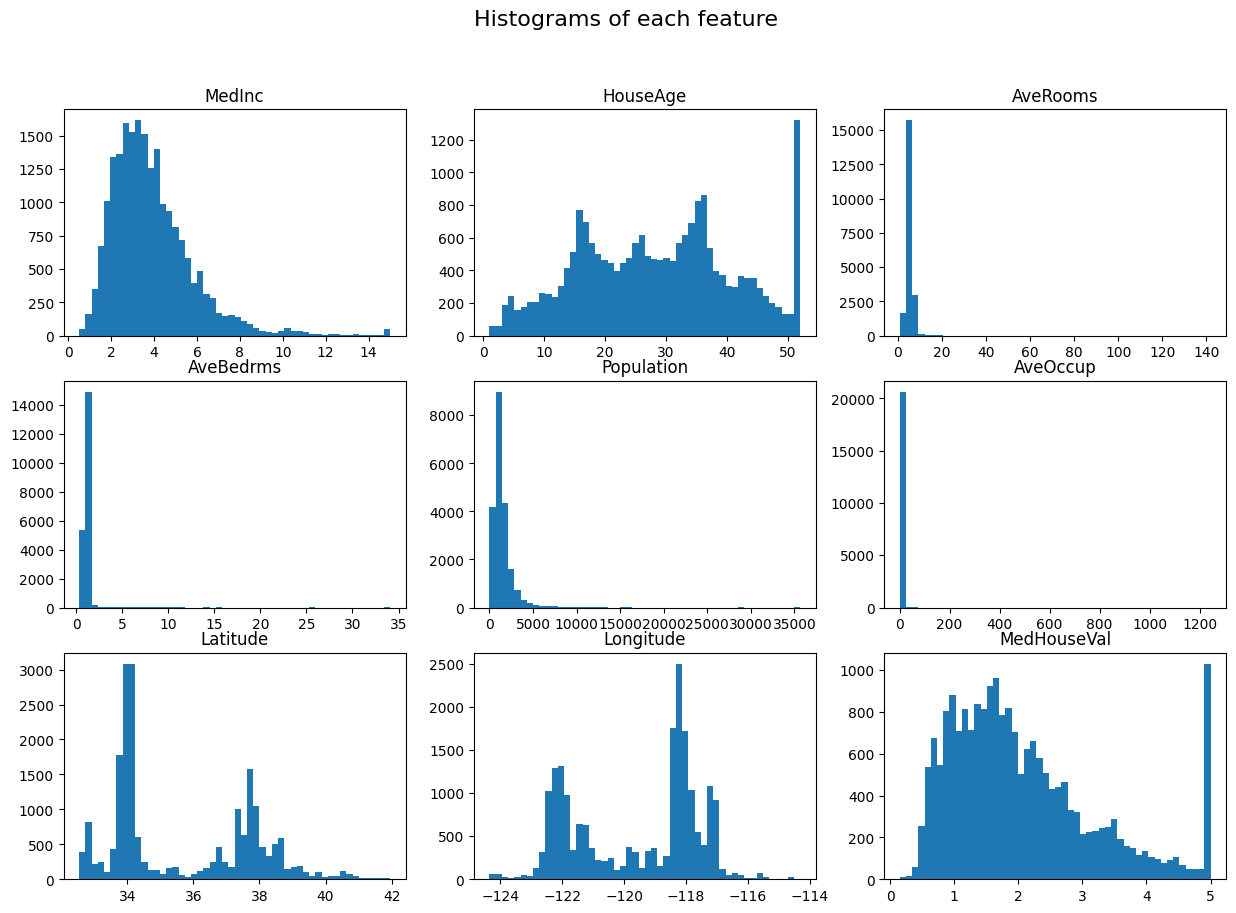

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    ax.hist(data[:, i], bins=50)
    ax.set_title(df.columns[i])
fig.suptitle('Histograms of each feature', fontsize=16)
plt.show()

## Dataset Histograms Insights

### MedInc (Median Income)
- The distribution of median income (`MedInc`) shows a right-skewed pattern, suggesting that most districts have a lower median income, with fewer districts having high median incomes.

### HouseAge
- The `HouseAge` histogram indicates a relatively uniform distribution, with a slight increase in frequency for older houses, highlighting the presence of established districts.

### AveRooms (Average Rooms)
- The `AveRooms` variable is highly right-skewed, revealing that most districts have a small number of rooms on average, with few districts having homes with many rooms.

### Population
- The population distribution is also right-skewed, with the majority of districts having smaller populations.

### AveBedrms (Average Bedrooms)
- Similar to `AveRooms`, the `AveBedrms` histogram is right-skewed, indicating that districts generally have a low average number of bedrooms.

### AveOccup (Average Occupancy)
- The average occupancy histogram shows a peak for lower occupancy numbers, suggesting that over-crowding is less common.

### Latitude & Longitude
- The histograms for `Latitude` and `Longitude` show that the dataset covers a specific geographic area, with concentrations of districts in particular locations.

### MedHouseVal (Median House Value)
- The median house value (`MedHouseVal`) is slightly right-skewed, with a spike at the higher value range, possibly indicating a cap on house value data.


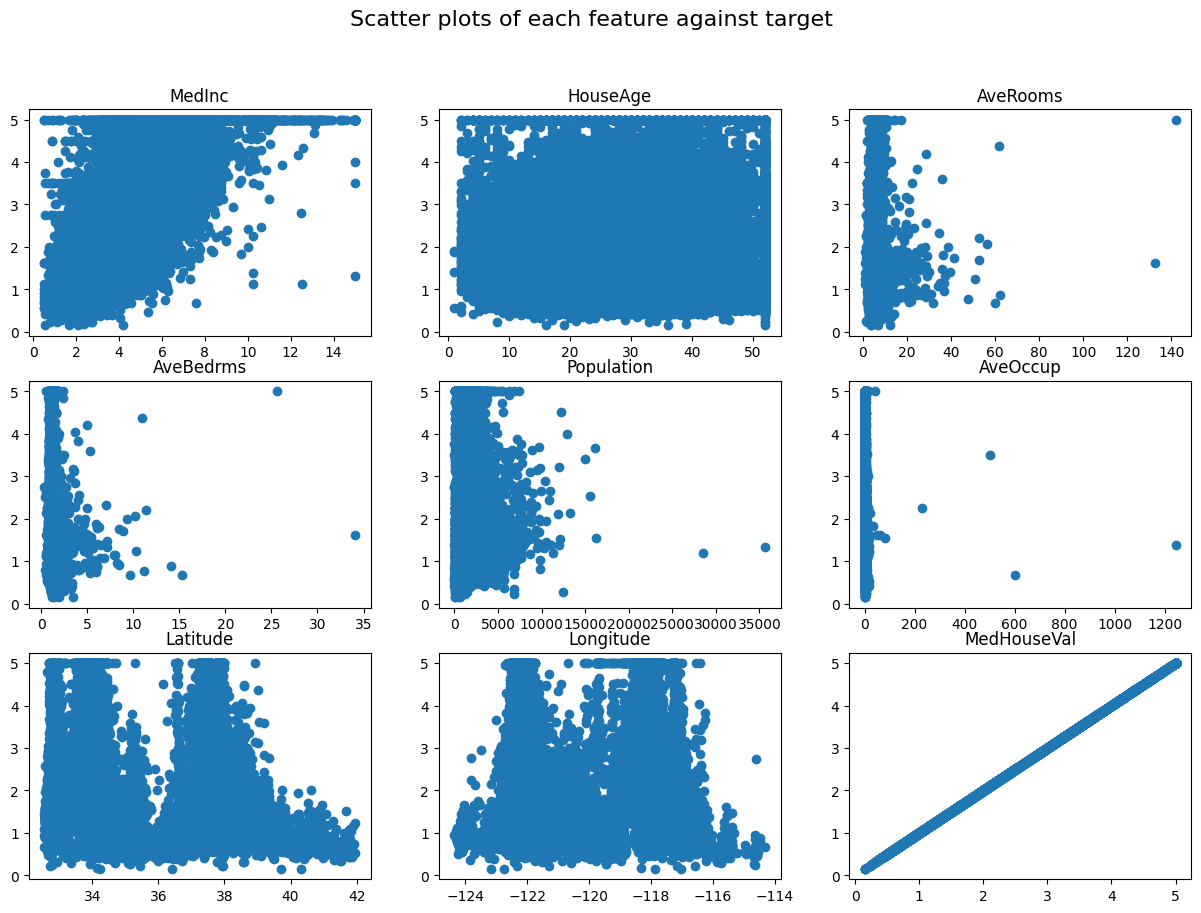

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(data[:, i], data[:, -1])
    ax.set_title(df.columns[i])
fig.suptitle('Scatter plots of each feature against target', fontsize=16)
plt.show()

## Scatterplots Insights:

- MedInc vs. Target: Shows a positive correlation; higher median income areas tend to have higher housing values.
- HouseAge vs. Target: Less clear relationship, but older houses don't necessarily have lower values.
- AveRooms, AveBedrms, AveOccup vs. Target: More rooms and bedrooms correlate with higher house values, while higher occupancy correlates with lower values.
- Latitude, Longitude vs. Target: Geographic location has a complex relationship with housing value, not linear but clustered in certain areas. <br><br>
The data suggests that income and size of the housing (in terms of rooms and bedrooms) are positively related to housing value, while higher occupancy tends to relate to lower housing values. Geographic factors also play a significant role, indicating potential for further spatial analysis.

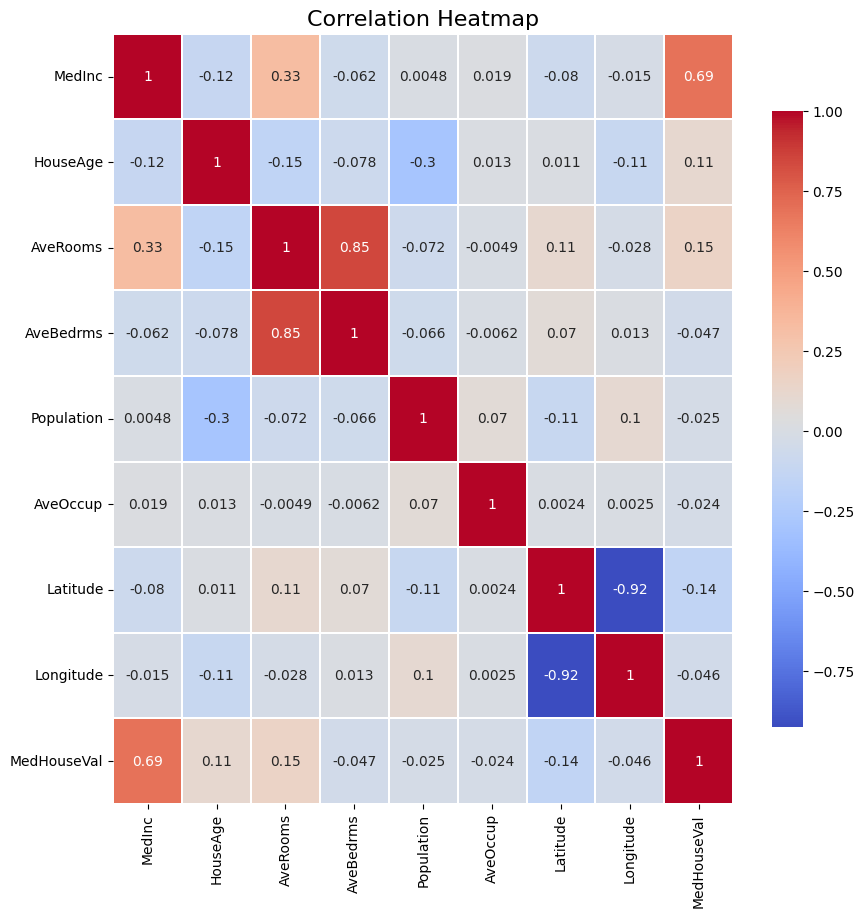

In [19]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8}, linecolor='white', linewidths=0.1)
plt.title('Correlation Heatmap', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

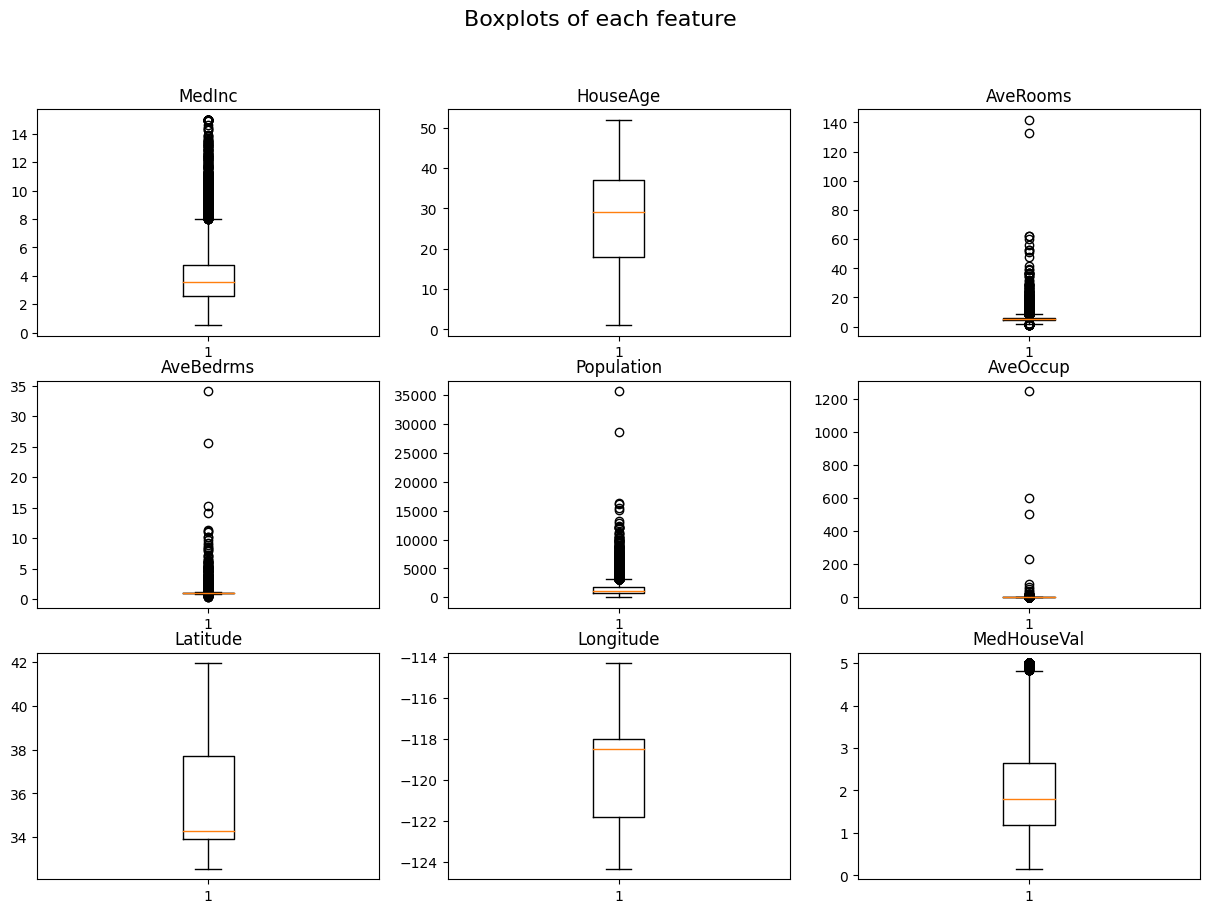

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    ax.boxplot(data[:, i])
    ax.set_title(df.columns[i])
fig.suptitle('Boxplots of each feature', fontsize=16)
plt.show()

- `MedInc`: Income distribution is right-skewed, indicating a higher concentration of lower-income households.
- `HouseAge`: A significant number of houses are older, as seen by the spikes in higher age bins.
- `AveRooms`: Average rooms per dwelling are generally low, but some outliers have a high room count.
- `AveBedrms`: Similar to average rooms, the number of bedrooms per dwelling is also low with few outliers.
- `Population`: Most blocks have a low population, with a few areas having a very high population.
- `AveOccup`: The average occupancy per household shows a peak at lower values, suggesting most homes have fewer occupants.
- `Latitude` & `Longitude`: Shows the concentration of data points in specific geographic areas, indicating clusters of housing data.
- `MedHouseVal`: Median house value is also right-skewed, with a majority of the houses valued at the lower end of the market.


standarize the features if necessary

In [21]:
standardized_data = (data - data.mean(axis=0)) / data.std(axis=0)
standardized_df = pd.DataFrame(standardized_data, columns=california_housing.feature_names + ['MedHouseVal'])

c:\Users\billi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


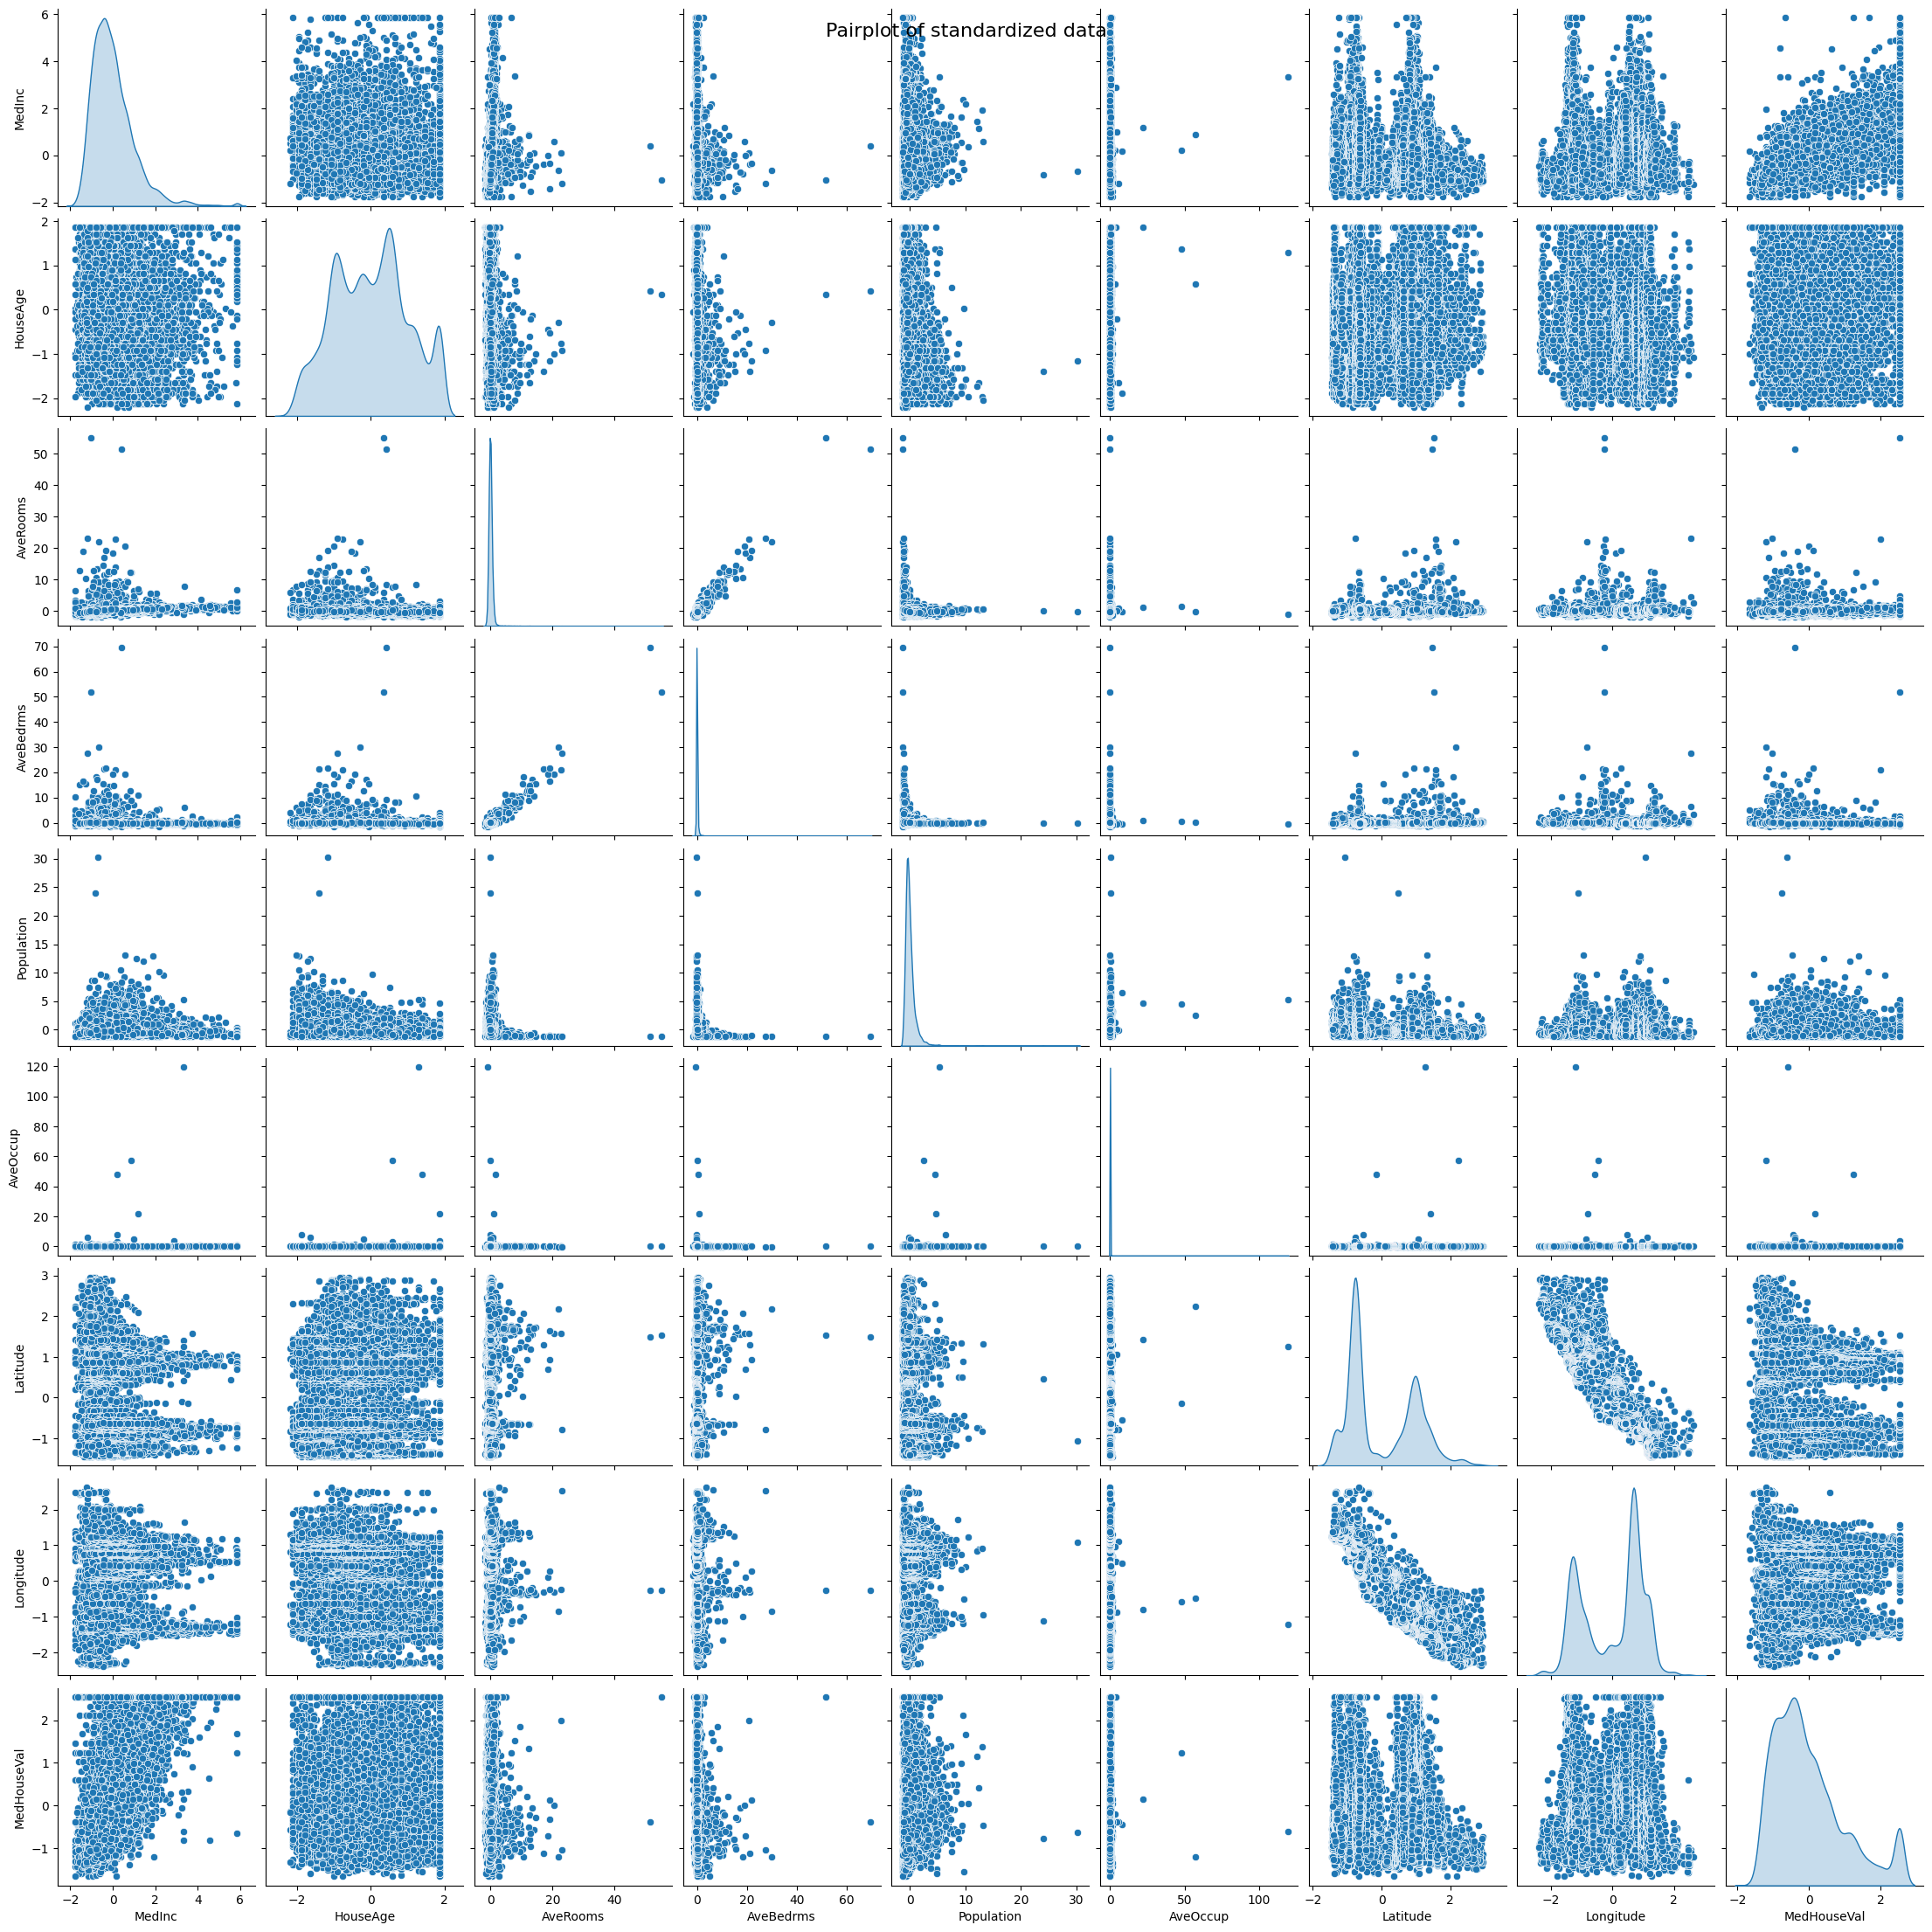

In [22]:
sns.pairplot(standardized_df, diag_kind='kde')
plt.suptitle('Pairplot of standardized data', fontsize=16)
plt.show()

perform PCA to reduce the number of features

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(standardized_data)
data_pca = pca.transform(standardized_data)

provide scatterplots for the case of projections in 2 and 3 dimensions

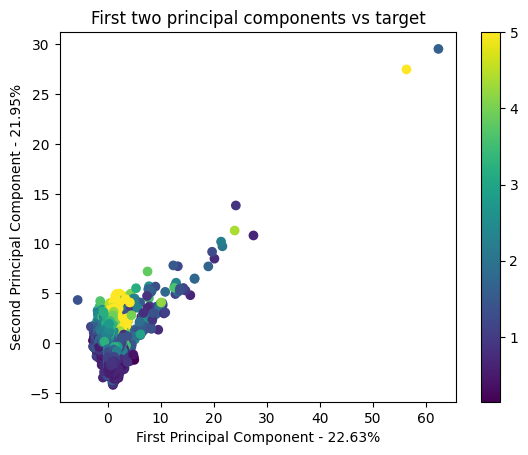

In [27]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data[:, -1])
plt.xlabel('First Principal Component - {:.2f}%'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('Second Principal Component - {:.2f}%'.format(pca.explained_variance_ratio_[1] * 100))
plt.title('First two principal components vs target')
plt.colorbar()
plt.show()

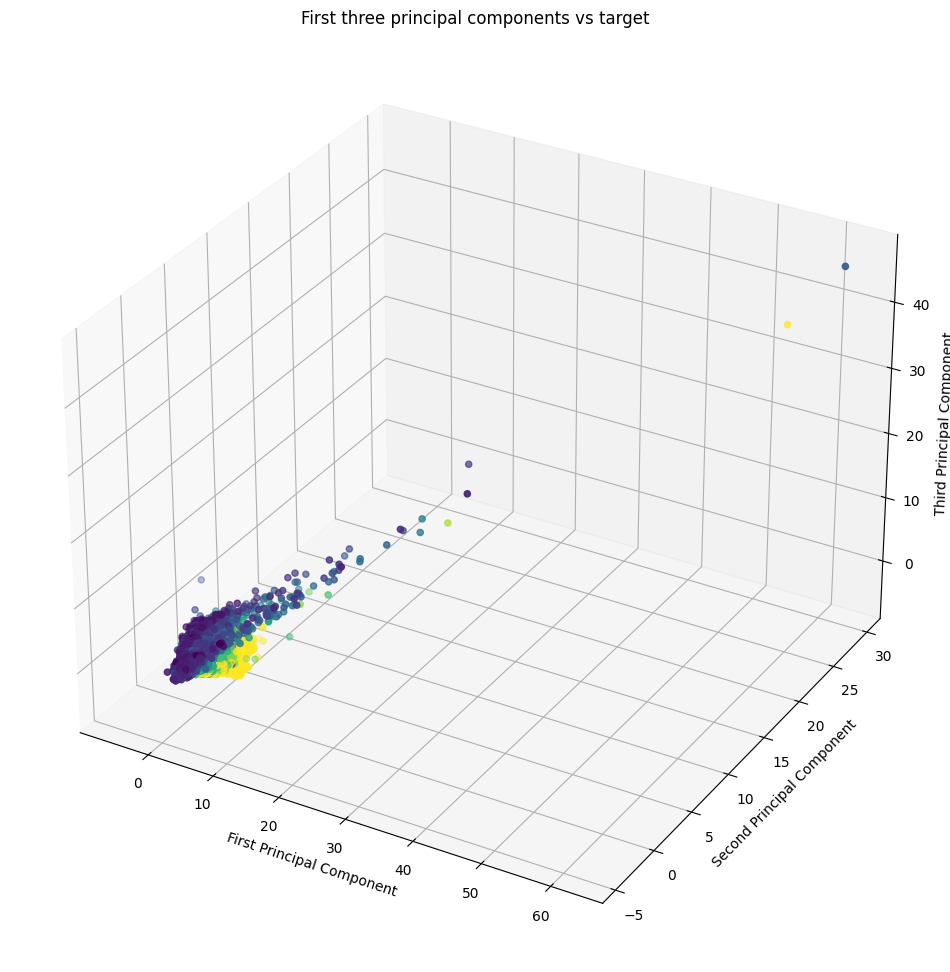

In [28]:
fig = plt.figure(figsize=(12, 18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=data[:, -1])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('First three principal components vs target')
plt.show()

perform linear regression using the original features

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred)
print('MSE using original features:', mse_original)

r2_original = r2_score(y_test, y_pred)
print('R2 using original features:', r2_original)

MSE using original features: 0.5558915986952425
R2 using original features: 0.5757877060324521


perform linear regression using PCA-reduced features

In [30]:
from sklearn.preprocessing import StandardScaler

# Perform PCA with 2 components and calculate the MSE and R2 score
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_pca = mean_squared_error(y_test, y_pred)
print('MSE using PCA (2 PC):', mse_pca)

r2_pca = r2_score(y_test, y_pred)
print('R2 using PCA (2 PC):', r2_pca)


# Perform PCA with 3 components and calculate the MSE and R2 score
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_pca_3 = mean_squared_error(y_test, y_pred)
print('MSE using PCA (3 PC):', mse_pca_3)

r2_pca_3 = r2_score(y_test, y_pred)
print('R2 using PCA (3 PC):', r2_pca_3)

MSE using PCA (2 PC): 1.2945562711590004
R2 using PCA (2 PC): 0.01209752630295624
MSE using PCA (3 PC): 1.288671261631135
R2 using PCA (3 PC): 0.016588497919897804


Compare the perfornance of linear regression on the original vs the PCA features

In [31]:
print('MSE using original features:', mse_original)
print('MSE using PCA (2 PC):', mse_pca)
print('MSE using PCA (3 PC):', mse_pca_3)

print('R2 using original features:', r2_original)
print('R2 using PCA (2 PC):', r2_pca)
print('R2 using PCA (3 PC):', r2_pca_3)

MSE using original features: 0.5558915986952425
MSE using PCA (2 PC): 1.2945562711590004
MSE using PCA (3 PC): 1.288671261631135
R2 using original features: 0.5757877060324521
R2 using PCA (2 PC): 0.01209752630295624
R2 using PCA (3 PC): 0.016588497919897804


## Linear Regression Performance Analysis

When evaluating the performance of linear regression, it's evident that the model trained on the original features outperforms the PCA-transformed features. The mean squared error (MSE) is a measure of the model's accuracy, with a lower value indicating better performance.

- **MSE Comparison**:
  - Original Features: `0.5559`
  - PCA (2 Principal Components): `1.2946`
  - PCA (3 Principal Components): `1.2887`

This higher MSE with PCA features suggests that reducing dimensionality has led to the loss of valuable information that was present in the original feature set.

- **R-Squared (R2) Comparison**:
  - Original Features: `0.5758`
  - PCA (2 Principal Components): `0.0121`
  - PCA (3 Principal Components): `0.0166`

The R2 score represents the proportion of variance for the target that's explained by the independent variables in the model. The closer to `1`, the better the model explains the target variable. The original features' R2 score is significantly higher, reinforcing the conclusion that the PCA features do not capture enough variance to predict the target effectively.

### Conclusion

The analysis indicates that while PCA can simplify the model and reduce overfitting, it does so at the cost of predictive accuracy. The original features maintain a balance of complexity and information that yields a better-performing model.


Quantify the impact of the number of principal components on the regression
?

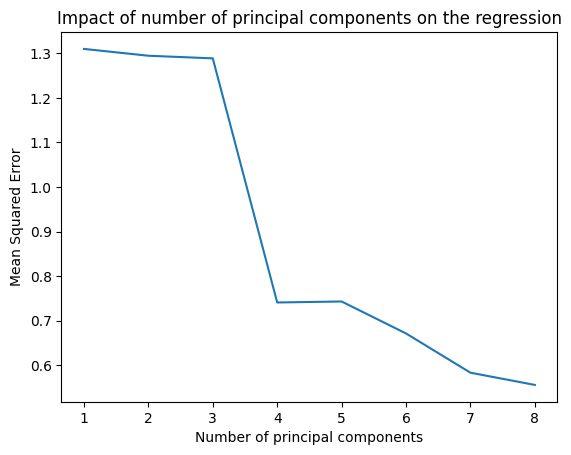

In [22]:
mse = []
for n in range(1, 9):
    X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_pca = mean_squared_error(y_test, y_pred)
    mse.append(mse_pca)

plt.plot(range(1, 9), mse)
plt.xlabel('Number of principal components')
plt.ylabel('Mean Squared Error')
plt.title('Impact of number of principal components on the regression')
plt.show()

The line graph above is called `scree plot` and shows the Mean Squared Error (MSE) of the regression model plotted against the number of principal components used. Initially, the MSE is quite high when only one principal component is used. This suggests that a single principal component does not capture enough variance in the data to make accurate predictions.

As more principal components are included (moving from one to two, then to three), the MSE drops sharply, indicating a significant improvement in the model's predictive accuracy. However, beyond the third principal component, the decrease in MSE becomes more gradual. This suggests that the first three principal components capture most of the significant variance in the data, and additional components provide diminishing returns in terms of model improvement.

The graph indicates that there's a point where adding more principal components does not yield significant improvement in prediction accuracy. This helps in identifying the optimal number of principal components that balances complexity and performance in the model. So, the impact of the number of principal components on the regression is significant initially, but diminishes as more components are added and helps in identifying the optimal number of principal components for the model.